<h1 style="text-align:center"> Life Expectancy and GDP </h1>
<h3 style="text-align:center"> A Codecademy Portfolio Project </h3>
<br>
This project is one of the portfolio projects that I completed as part of Codecademy's Data Science career path. It uses data that Codecademy gathered from the World Health Organization and the World Bank to investigate the links between Gross Domestic Product (GDP) and life expectancy at birth for six countries. After plotting life expectancy vs. GDP for all six nations, I determine whether the two features are in fact positively correlated and then try my hand at fitting a trendline to the life expectancy vs. GDP data. I also investigate the average life expectancy of the six countries as well has how that life expectancy changed over a 15-year period.<br>
<br>
Unlike previous Codecademy portfolio/capstone projects, this one came with no explicit directions other than to "analyze, prepare, and plot data in order to answer questions in a meaningful way." However, I rapidly realized that this particular project is nothing more than a work-over of what used to be a Codecademy guided "Capstone" project. My strategy was therefore to use the questions Codecademy prompted in the old Capstone project and to add my own touches where they seemed appropriate. I believe this to be a reasonable approach in light of the very limited data provided for the project: given just 16 GDP/life expectancy data points for 6 nations, there's only so many questions one can ask.<br>
<br>
Here are the specific questions addressed by this project:
<ol>
    <li> What is the average life expectancy in the six nations? </li>
    <li> What does the life expectancy distribution of each nation look like?  </li>
    <li> Has life expectancy increased over time in the six nations? </li>
    <li> Has GDP increased over time in these nations? </li>
    <li> Is there a correlation between GDP and life expectancy of a country? </li>
</ol>
I am including my code here so that visitors to my GitHub can clearly see what I did and how I approached the project. I will also include the database given to me by Codecademy in the repository.
<br>
In the old Capstone project, Codecademy gave the following references as to where they gathered the data:<br>
GDP Source: <a href="https://data.worldbank.org/indicator/NY.GDP.MKTP.CD"> World Bank</a> national accounts data, and OECD National Accounts data files.<br>
Life expectancy Data Source: <a href="http://apps.who.int/gho/data/node.main.688"> World Health Organization </a>


<h2> Importing the Data and Various Python Packages </h2>
<br>
In order to answer the questions posed above, I will need to import the data itself. I will also need to import some Python packages to aid in my analysis. The code below accomplishes these tasks.

In [1]:
# Import general data analysis and plotting packages:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Import correlation-testing functions:
from scipy.stats import pearsonr, spearmanr

# Import linear regression method: 
from sklearn.linear_model import LinearRegression

In [2]:
# Import the data itself, as provided by Codecademy:
alldata = pd.read_csv('all_data.csv')

<h2> Investigating the Data </h2>
<br>
Now that the data set has been imported, I will take a look at it. First, I will print the DataFrame header to see how the information I was provided with is formatted:

In [3]:
# Look at the header information:
print(alldata.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


I note from the old Codecademy Capstone project that "GDP values are in current US dollars." However, I suspect that the .csv file itself actually dates to around 2018 or so, and thus the GDP values are most likely in 2018 U.S. dollars. I will not be converting from 2018 U.S. dollars to 2021 U.S. dollars for this project.

In any event, the data are very limited and they are simple. The column titles could be a mite hard to work with, so I will rename them:

In [4]:
# Rename the columns:
alldata.rename(columns = {'Country':'country', 'Year': 'year', \
                          'Life expectancy at birth (years)': 'life_expect_at_birth', \
                          'GDP': 'gdp'}, inplace = True)

I further note that the column containing GDP (in ~2018 U.S. dollars) is really unwieldy: the numbers are so large that they are printed in scientific notation. To make these numbers more manageable, I will make a new column which contains the GDP column divided by $10^{12}$ (i.e., a trillion); this will yield GDP in trillions of U.S. dollars. And, for reasons which shall become obvious by the end of this notebook, I will also make a column which contains the GDP in billions $(10^{9 })$ of U.S. dollars; to make it, I will simply divide the original GDP column by $10^9.$

In [5]:
# Make a new column that is GDP/10^9:
alldata['gdp_bil_usd'] = alldata.gdp / 1000000000

# Make another new column that is GDP/10^12:
alldata['gdp_tril_usd'] = alldata.gdp / 1000000000000

Let me check to make sure the modifications I made to the DataFrame went alright (and get information about the data types of the columns while I am at it):

In [6]:
# Print the updated DataFrame information to make sure nothing has gone wrong:
print(alldata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               96 non-null     object 
 1   year                  96 non-null     int64  
 2   life_expect_at_birth  96 non-null     float64
 3   gdp                   96 non-null     float64
 4   gdp_bil_usd           96 non-null     float64
 5   gdp_tril_usd          96 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.6+ KB
None


What years do the data span?

In [7]:
# Print the maximum and minimum of the "year" column:
print("Starting year: " + str(alldata.year.min()) + "; Ending year: " + str(alldata.year.max()))

Starting year: 2000; Ending year: 2015


As noted in the introduction, the data in the provided DataFame thus correspond to 15 years worth of data. 

How many data points per country? And which specific 6 countries will I be dealing with?

In [8]:
# Print the value counts of the unique country names included in the DataFrame:
print(alldata.country.value_counts())

Germany                     16
China                       16
United States of America    16
Zimbabwe                    16
Chile                       16
Mexico                      16
Name: country, dtype: int64


All countries have 16 data points, meaning that all years from 2000 to 2015 are included for all countries.

The choice of countries that were included in this dataset is interesting. Five of the seven traditional continents are represented, with North America being represented twice. Including China in the dataset makes sense to me, as it has seen a drastic change in GDP as it becomes a larger and larger player in the global economy. Germany over the past 20 or so years has been one of the most prosperous, stable economies in Europe, so the choice of Germany makes sense to me as well. Including the U.S. in a dataset compiled by a U.S. business is a no-brainer; I assume that Mexico is included since it is one of the nations that borders the U.S. but is not usually seen as a big global economy. I believe that Chile was included because, according to <a href = "https://en.wikipedia.org/wiki/Economy_of_Chile"> Wikipedia </a>, it is one of the strongest economies in South America. It has been a member of OECD since 2010, and has a history of successful economic reforms in transitioning from the policies of the Pinochet regime to the modern economic policies begun by the B&uuml;chi and Aylwin regimes. The data from Zimbabwe in particular will be interesting, as it is one of Africa's emerging economies. It has had a very tumultous post-colonial history under Robert Mugabe, with a GDP decline between 1999 and 2009 during which there was a period of hyperinflation. (Source: <a href = "https://en.wikipedia.org/wiki/Zimbabwe#Economy"> Wikipedia </a>) From what I am to understand in the brief research I did into Zimbabwe's economy, policies allowing the use of currencies such as the U.S. dollar, the U.K. sterling pound, the South African rand, and the Botswanan pula helped stabilize the economy and ushered in a period of GDP growth. It will be interesting to see how this history is reflected in the GDP reported in this dataset, as well as the life expectancy at birth of Zimbabwe. According to my brief research, the period of hyperinflation during the mid 2000s as well as several disease outbreaks has no doubt had an impact on life expectancy estimates.

<h2> Visualizing the Data </h2>
<br>
Now that the data have been compiled into a DataFrame, and the DataFame has been updated for column names and values, I should make some plots to visualize them. Fortunately, there are only two features to plot: life expectancy at birth and GDP. So, I will make plots which visualize each of these features.<br>

<b> Bar Plot of Average GDP </b> <br>
The first plot I will make is a bar plot of average GDP over the 15-year period. Each bar will correspond to one country. Admittedly, average GDP isn't the most descriptive of statistics given the overall growth in GDP of each country over the 15 year span; however, it will give a very broad overview of which countries tend to have the highest GDPs and which have the lowest.

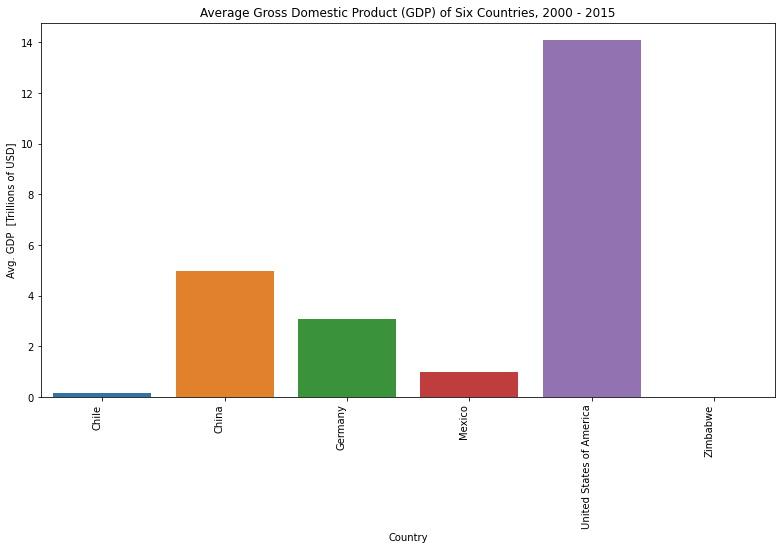

In [9]:
# Use Seaborn to make a bar plot of average GDP:
plt.figure(figsize = (12,8))
fig1 = sns.barplot(data = alldata, x = 'country', y = 'gdp_tril_usd', ci = None)
sns.set_palette('muted')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Avg. GDP  [Trillions of USD]')
plt.title('Average Gross Domestic Product (GDP) of Six Countries, 2000 - 2015')
plt.subplots_adjust(left=0.1, bottom=0.3, right=0.95, top=0.95, wspace=0, hspace=0)
plt.savefig('fig_1_avg_gdp_in_tril_usd.png')

As one might have suspected, the U.S. has by far and away the highest average GDP of the six nations. China is next highest after the U.S., again unsurprisingly, and Germany has the third highest average GDP. It is worth noting that the average GDP of Zimbabwe is so small compared to that of the other five nations that it doesn't even show up on this bar graph. This is why I made the <i>gdp_bil_usd</i> column: it scales the data for Zimbabwe according to a scale factor which is more appropriate for its average value than the scale factor used for the U.S. and the other nations. It should be noted that the same scale factor which is appropriate for Zimbabwe would also be appropriate for Chile, as its average GDP just barely shows up on the bar graph of average GDPs above. In the below, however, I will use the <i>gdp_tril_usd</i> when plotting Chile's GDP. The reasons why will become obvious once the plot is constructed.

<b> Bar Plot of Average Life Expectancy at Birth </b> <br>
The next plot I will make is a bar plot of average life expectancy (at birth) over the 15-year period. Again, average life expectancy isn't the most descriptive of statistics given that it increased in each country over the 15-year span; however, it will indicate if there are any broad differences in terms of scale of life expectancy between countries:

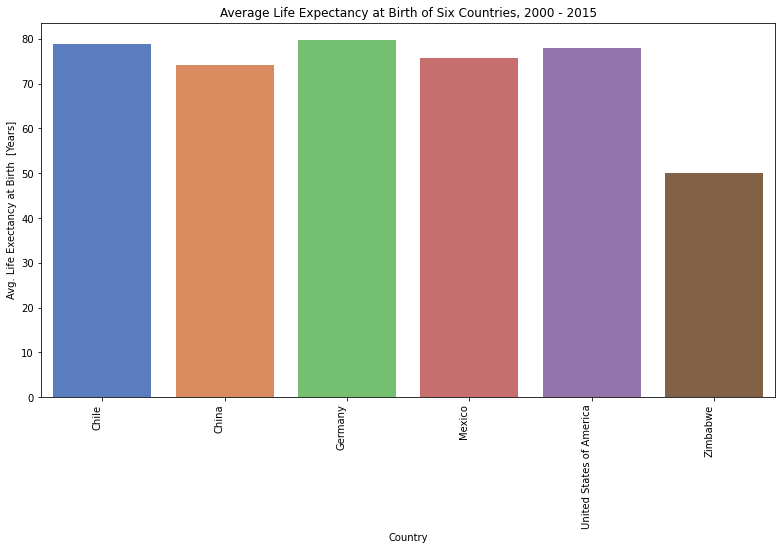

In [10]:
plt.figure(figsize = (12,8))
fig2 = sns.barplot(data = alldata, x = 'country', y = 'life_expect_at_birth', ci= None)
sns.set_palette('muted')
fig2.set_xticklabels(fig1.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel('Country')
plt.ylabel('Avg. Life Exectancy at Birth  [Years]')
plt.title('Average Life Expectancy at Birth of Six Countries, 2000 - 2015')
plt.subplots_adjust(left=0.1, bottom=0.3, right=0.95, top=0.95, wspace=0, hspace=0)
plt.savefig('fig_2_avg_life_expect.png')

All countries except Zimbabwe have quite comparable average life expectancies. Germany's average life expectancy is highest, followed by Chile and then the U.S. At least visually, the average life expectancies of the first 5 nations plotted seem to vary by only a couple of years or so. (Below, I will calculate the actual averages to see how well the previous statement holds up.) Zimbabwe's average life expectancy at birth is well below that of the other 5 nations, by approximately 20 years.

<b> Initial Interpretation of the Two Plots Together </b> <br>
The USA has highest GDP by about 8 trillion U.S. dollars, but its average life expectancy at birth is well within the range of those of other major world economies. So at least in absolute terms, having a very high average GDP does not guarantee that a nation will have a correspondingly high average life expectancy at birth. Zimbabwe has an average GDP that doesn't even appear on the same scale as that of the other five nations, and it has a correspondingly lower average life expectancy. This might be expected if one assumes that average GDP is positively correlated with average life expectancy. However, Chile has a very small average GDP and arguably the largest average life expectancy of all six countries. China, Mexico, and Germany all have about the same average GDP (broadly speaking), and about the same average life expectancy. <br>
<br>
Thus, my main takeaway thus far is that average GDP does not necessarily correlate with average life expectancy; nations such as Chile can have small average GDPs but high average life expectancies, and nations like the U.S. with very large GDPs don't necessarily have correspondingly high average life expectancies. It should be noted that there is a maximum human lifespan of about 120 years or so (give or take a little bit), at this moment in history at least, so it seems unlikely that average life expectancies at birth will be much higher than 85 years or so; thus, there may well be a soft cap on how many more years of average life expectancy a nation could achieve by increasing its GDP. However, the fact that comparably high average life expectancies can be achieved by countries with much more modest GDPs indicates that there's a lot more than just average GDP that contributes in absolute terms to average life expectancy.

<b> Violin Plots of Life Expectancy at Birth </b> <br>
As noted above, an average life expectancy at birth computed over 15 years of data isn't the greatest statistic to look at when trying to get a sense of how life expectancy varies by country. Instead, it would be nice to get a sense of what the distribution of life expectancies for each country looks like. Given only 16 data points, making a histogram of life expectancies isn't terribly informative; instead, I will make a violin plots of the life expectancies at birth of each nation in the dataset. A violin plot is more informative than a traditional bar plot because it plots the kernel density estimate of the data, meaning that it plots the probability that a given life expectancy value will lie in some particular range. In a sense, it smooths over the 16 data points and thus allows a continuous plot of the life expectancy data to be made; this is preferable to a histogram of the data whose appearance would depend on chosen bin size, and depending on that bin size may not display much of the underlying structure in the distribution.

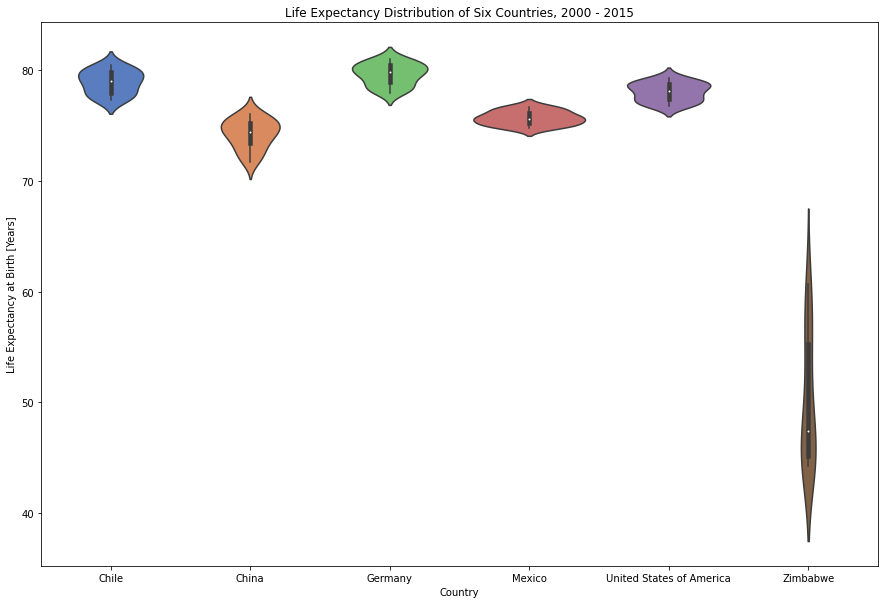

In [11]:
fig = plt.subplots(figsize=(15, 10)) 
sns.set_palette('muted')
sns.violinplot(data = alldata, x = 'country', y = 'life_expect_at_birth')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth [Years]')
plt.title ('Life Expectancy Distribution of Six Countries, 2000 - 2015')
plt.savefig('fig3_life_expect_dist_six_countries.png')

While this particular plot is moderately informative, the difference in scale between the life expectancy distribution of Zimbabwe and the life expectancy distribution of the other 5 nations is making it hard to see any real detail in any of the violin plots. (Note that there are two KDE distributions being plotted symmetrically about the middle line for each country, which is why the left-hand side seems to be the mirror image of the right hand side of each "violin.") The only things which are readily apparent are that Zimbabwe's life expectancy distribution is very broad and bimodal, and that the life expectancy distributions of the other 5 nations are more much more compact.

To tease out more information about the overall shapes of the life expectancy distributions of these nations, it is clear that two separate plots must be made: one of just Zimbabwe's life expectancy distribution, and one for the life expectancy distributions of the other 5 nations. I will address this by first making a visualization which shows the violin plots of the life expectancy distributions of Chile, China, Germany, Mexico, and the U.S.

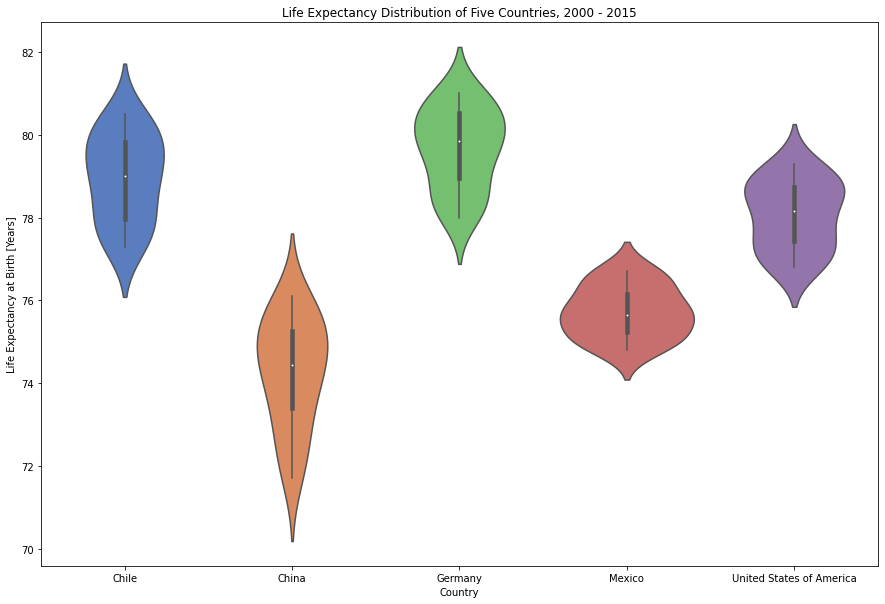

In [12]:
fivecdata = alldata[alldata.country != 'Zimbabwe']

plt.subplots(figsize=(15,10)) 
sns.set_palette('muted')
sns.violinplot(data = fivecdata, x = 'country', y = 'life_expect_at_birth')
plt.xlabel('Country')
plt.ylabel('Life Expectancy at Birth [Years]')
plt.title ('Life Expectancy Distribution of Five Countries, 2000 - 2015')
plt.savefig('fig4a_life_expect_dist_details.png')

Since this plot focuses on the data which are all on about the same scale, it is easier to see the more detailed structure of each life expectancy (at birth) distribution. China's distribution is the broadest of the five, while Mexico's is the narrowest. The life expectancy distributions of Chile, Germany, and the U.S. appear to be bimodal, with the taller peak occurring at higher life expectancy; China's distribution is unimodal with a long tail extending toward lower life expectancies. Mexico's distribution peaks at about 75 years or so, and has a bit of a tail extending toward higher life expectancies; it appears to be a unimodal distribution, although there does seem to be a bit of a "bump" in the high life expectancy tail. The white dot in each figure denotes the median life expectancy which lies at the middle of the range of data. It is highest for Germany and lowest for China, with the U.S. ranking third in terms of median life expectancy.

Now it is time to construct a visualization which contains just the violin plot of Zimbabwe's life expectancy distribution:

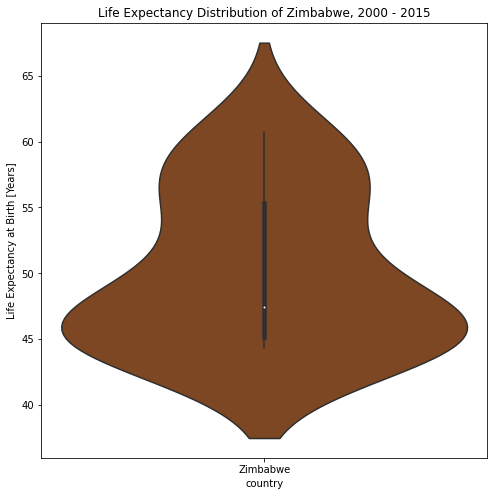

In [13]:
zimbdata = alldata[alldata.country == 'Zimbabwe']

plt.subplots(figsize=(8,8)) 
sns.violinplot(data = zimbdata, x = 'country', y = 'life_expect_at_birth', color='saddlebrown')
plt.ylabel('Life Expectancy at Birth [Years]')
plt.title ('Life Expectancy Distribution of Zimbabwe, 2000 - 2015')
plt.savefig('fig4b_life_expect_dist_details.png')

This distribution is clearly bimodal, with the tallest peak lying at lower life expectancies. The median life expectancy also lies at low life expectancy. However, the distribution has a long tail toward high life expectancies, and a second peak which occurs at about 55 years or so.   

<h2> Average Life Expectancy at Birth </h2>
<br>
In the above figures, a bar plot of the average life expectancy at birth of the six nations was constructed, but it was difficult to get a firm numerical value for that average from just the plot. Below, I calculate the average life expectancy at birth of each country using NumPy; I will also calculate the standard deviation of life expectancy to get some sense of the spread in the data. Lastly, since the violin plots constructed above show median life expectancy as a white dot, I will use NumPy to get a firm calculation of the median life expectancy of each nation.

In [14]:
# Separate each country into its own DataFrame:
chiledata = alldata[alldata.country == 'Chile']
chinadata = alldata[alldata.country == 'China']
germanydata = alldata[alldata.country == 'Germany']
mexicodata = alldata[alldata.country == 'Mexico']
usadata = alldata[alldata.country == 'United States of America']
zimbabwedata = alldata[alldata.country == 'Zimbabwe']

In [15]:
print(np.mean(zimbabwedata.gdp_bil_usd))
print(np.mean(chiledata.gdp_bil_usd))

9.062579595062502
169.78884501531252


In [16]:
# Using each country's DataFrame, calculate its average life expectancy at birth:
chile_avg_life_expect_at_birth = np.mean(chiledata.life_expect_at_birth)
china_avg_life_expect_at_birth = np.mean(chinadata.life_expect_at_birth)
germany_avg_life_expect_at_birth = np.mean(germanydata.life_expect_at_birth)
mexico_avg_life_expect_at_birth = np.mean(mexicodata.life_expect_at_birth)
usa_avg_life_expect_at_birth = np.mean(usadata.life_expect_at_birth)
zimbabwe_avg_life_expect_at_birth = np.mean(zimbabwedata.life_expect_at_birth)

# Using each country's DataFrame, calculate its standard deviation of life expectancy at birth:
chile_stddev_life_expect_at_birth = np.std(chiledata.life_expect_at_birth)
china_stddev_life_expect_at_birth = np.std(chinadata.life_expect_at_birth)
germany_stddev_life_expect_at_birth = np.std(germanydata.life_expect_at_birth)
mexico_stddev_life_expect_at_birth = np.std(mexicodata.life_expect_at_birth)
usa_stddev_life_expect_at_birth = np.std(usadata.life_expect_at_birth)
zimbabwe_stddev_life_expect_at_birth = np.std(zimbabwedata.life_expect_at_birth)

# Using each country's DataFrame, calculate its median life expectancy at birth:
chile_median_life_expect_at_birth = np.median(chiledata.life_expect_at_birth)
china_median_life_expect_at_birth = np.median(chinadata.life_expect_at_birth)
germany_median_life_expect_at_birth = np.median(germanydata.life_expect_at_birth)
mexico_median_life_expect_at_birth = np.median(mexicodata.life_expect_at_birth)
usa_median_life_expect_at_birth = np.median(usadata.life_expect_at_birth)
zimbabwe_median_life_expect_at_birth = np.median(zimbabwedata.life_expect_at_birth)

In [17]:
# Print out the results to the appropriate number of significant figures:

#Chile:
print('Chile avg. life expectancy at birth: ' + str(round(chile_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(chile_stddev_life_expect_at_birth,0)))
print('Chile median life expectancy at birth: ' + str(round(chile_median_life_expect_at_birth,0)))
print('')

# China:
print('China avg. life expectancy at birth: ' + str(round(china_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(china_stddev_life_expect_at_birth,0)))
print('China median life expectancy at birth: ' + str(round(china_median_life_expect_at_birth,0)))
print('')

# Germany:
print('Germany avg. life expectancy at birth: ' + str(round(germany_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(germany_stddev_life_expect_at_birth,0)))
print('Germany median life expectancy at birth: ' + str(round(germany_median_life_expect_at_birth,0)))
print('')

# Mexico:
print('Mexico avg. life expectancy at birth: ' + str(round(mexico_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(mexico_stddev_life_expect_at_birth,0)))
print('Mexico median life expectancy at birth: ' + str(round(mexico_median_life_expect_at_birth,0)))
print('')

# the U.S.:
print('U.S.A. avg. life expectancy at birth: ' + str(round(usa_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(usa_stddev_life_expect_at_birth,0)))
print('U.S.A. median life expectancy at birth: ' + str(round(usa_median_life_expect_at_birth,0)))
print('')

# Zimbabwe:
print('Zimbabwe avg. life expectancy at birth: ' + str(round(zimbabwe_avg_life_expect_at_birth,0)) + '  +/- ' +\
     str(round(zimbabwe_stddev_life_expect_at_birth,0)))
print('Zimbabwe median life expectancy at birth: ' + str(round(zimbabwe_median_life_expect_at_birth,0)))

Chile avg. life expectancy at birth: 79.0  +/- 1.0
Chile median life expectancy at birth: 79.0

China avg. life expectancy at birth: 74.0  +/- 1.0
China median life expectancy at birth: 74.0

Germany avg. life expectancy at birth: 80.0  +/- 1.0
Germany median life expectancy at birth: 80.0

Mexico avg. life expectancy at birth: 76.0  +/- 1.0
Mexico median life expectancy at birth: 76.0

U.S.A. avg. life expectancy at birth: 78.0  +/- 1.0
U.S.A. median life expectancy at birth: 78.0

Zimbabwe avg. life expectancy at birth: 50.0  +/- 6.0
Zimbabwe median life expectancy at birth: 47.0


As expected, Zimbabwe's life expectancy distribution has the largest standard deviation. The standard deviations of the other distributions are comparable. Germany's average life expectancy and Chile's average life expectancy within a standard deviation of each other and so in my mind are pretty much the same; the average life expectancy of the U.S. is pretty much the same as the average life expectancy of Chile for the same reason. The average life expectancy of the U.S. is within two standard deviations of Germany's average life expectancy and so the two are not very different; the same is true of the average life expectancy of the U.S. and the average life expectancy of Mexico. The average life expectancy of China is within two standard deviations of Mexico's average life expectancy, but 4 or more standard deviations away from the average life expectancies of Chile, Germany, and the U.S. Zimbabwe's average life expectancy is clearly significantly different from those of the other 5 nations, and given its broad bimodal distribution it is the only nation whose median life expectancy is significantly different from its average life expectancy.

In summary, the average life expectancies of Chile, Germany, and the U.S. are all fairly similar. The average life expectancy of Mexico is similar to that of the U.S., but significantly different from that of Chile and Germany; the average life expectancy of China is significantly different from those of the U.S., Chile, and Germany. Zimbabwe's life expectancy is about 15 years lower than any other nations'.

<h2> Variation in GDP and Life Expectancy at Birth over Time </h2>
<br>
It is to be expected with technological and medical advancements that life expectancy at birth will change over the course of years and decades. Hopefully that trend is toward longer life expectancy, but this need not always be the case. Time variation in life expectancy at birth is, in my mind, one of the most important metrics to consider when investigating a nation's life expectancy, so it is one of the most important plots to make. It is also interesting to investigate how the GDP of a country changes over the same timeframe, to see if life expectancy and GDP demonstrate similar trends over time. Below, I construct plots of the variation of life expectancy at birth with time, and of the variation of GDP with time, for all 6 nations over the full 15 year range of data.

<b> Time Variation in Life Expectancy at Birth </b> <br>
First, I will plot the variation of life expectancy at birth with time for each country. I will gather them all into one figure, but please carefully note that the scale of each plot will be different for each country. I am doing this to make trends in the time variation of life expectancy easier to see; they might well get washed out if all the data were plotted on a single plot on the same scale. I thus caution the reader that absolute comparisons between plots will be difficult to make; indeed, the below plot was not meant to facilitate absolute comparisons. Rather, it is mean to highlight the trend  of life expectancy with time for each individual country to show its features and rate of change.

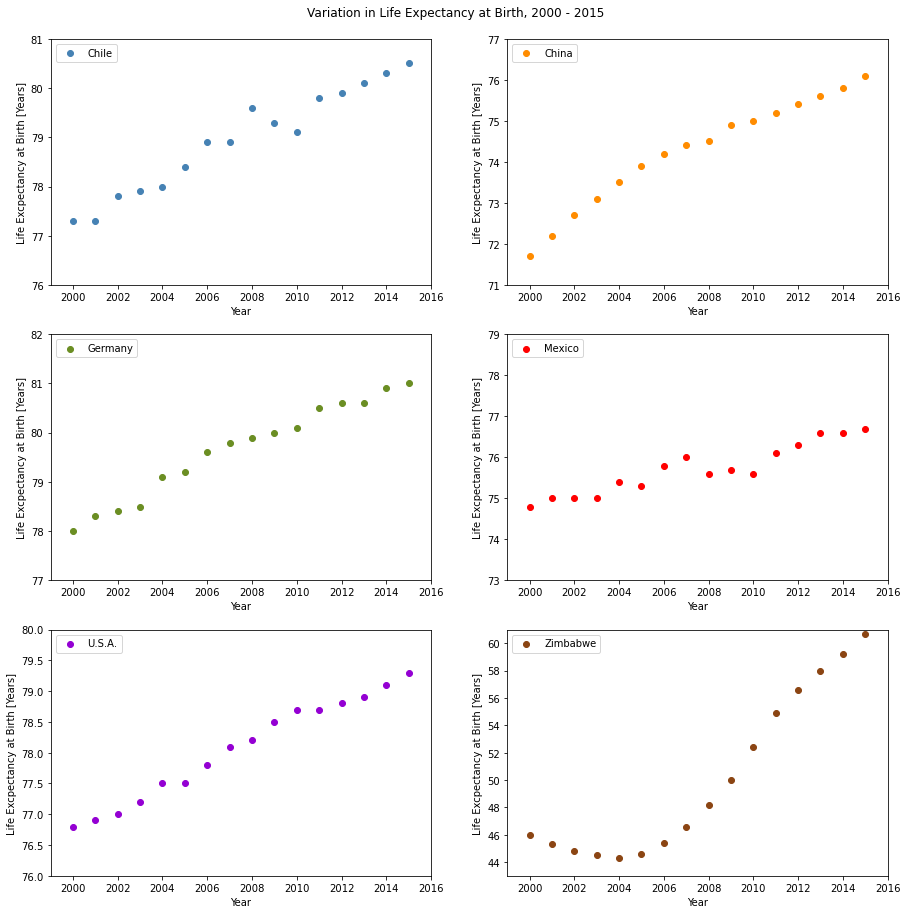

In [18]:
plt.figure(figsize=(15, 15)) 

# Since I already have the data split into 6 DataFrames, one for each country, I will use those individual DataFrames
# when plotting rather than the main alldata DataFrame. This will make the code easier to interpret.

plt.subplot(3,2,1)
plt.scatter(chiledata.year, chiledata.life_expect_at_birth, color = 'steelblue')
plt.axis([1999,2016,76,81])
plt.legend(['Chile'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,2)
plt.scatter(chinadata.year, chinadata.life_expect_at_birth, color = 'darkorange')
plt.axis([1999,2016,71,77])
plt.legend(['China'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,3)
plt.scatter(germanydata.year, germanydata.life_expect_at_birth, color = 'olivedrab')
plt.axis([1999,2016,77,82])
plt.legend(['Germany'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,4)
plt.scatter(mexicodata.year, mexicodata.life_expect_at_birth, color = 'red')
plt.axis([1999,2016,73,79])
plt.legend(['Mexico'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,5)
plt.scatter(usadata.year, usadata.life_expect_at_birth, color = 'darkviolet')
plt.axis([1999,2016,76,80])
plt.legend(['U.S.A.'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,6)
plt.scatter(zimbabwedata.year, zimbabwedata.life_expect_at_birth, color = 'saddlebrown')
plt.axis([1999,2016,43,61])
plt.legend(['Zimbabwe'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.suptitle('Variation in Life Expectancy at Birth, 2000 - 2015', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9)

plt.savefig('fig_5_life_expectancy_over_time.png')

It can be readily seen that the life expectancies at birth of Chile, China, Germany, Mexico, and the U.S. increased each year over the entire 15-year range. Further, the trend of life expectancy with time is very roughly linear for those five nations; China's plot appears to deviate most from the linear trend, at least visually. If one takes rise/run as a rough indication of the increase in life expectancy at birth over time, China's plot has the steepest rate of change at about 0.3 years of life expectancy per year. The other nations all have comparable rates of change of life expectancy of about 0.2 years of life expectancy per year. So while life expectancy increased in five of the six nations over the entire 15-year span, the rate of change was most rapid in China but comparable in the other four. Zimbabwe's plot of life expectancy at birth over time is quite interesting. It actually decreased between 2000 and 2004, then began a rapid increase. In fact, if one assumes that the growth in life expectancy at birth for Zimbabwe between 2006 and 2016 is roughly linear (by eye it doesn't appear to be, but assume for the moment), the rate of growth is roughly 1.5 years of life expectancy / year, which is quite a remarkable rate of increase over a single decade. The obvious question to ask is, "What happened in Zimbabwe around the year 2004 which halted its decline in life expectancy at birth and started a rapid increase in life expectancy?" Perhaps I will gain a little bit of insight into this with the plot below.

<b> Time Variation in GDP </b> <br>
Now I will plot the variation of GDP with time for each country. I will gather them all into one figure, but again carefully note that the scale of each plot will be different for each country. In particular, I will be plotting the GDP of Zimbabwe in billions of U.S. dollars rather than trillions of U.S. dollars, as that is the scale most appropriate for seeing the trends in this data. While one could certainly plot the GDP of Chile in trillions of U.S. dollars, I will instead plot Chile's GDP in billions of U.S. dollars, as it is intuitively easier to interpret a value of 150 billion dollars than 0.15 trillion dollars (or at least it is to me). So, the vertical axes of the plots of GDP with time for Chile and Zimbabwe will be on a different order of magnitude than the plots of GDP with time for the other four nations. However, the specific range of values spanned by the vertical axis of each plot will unique to each country. 

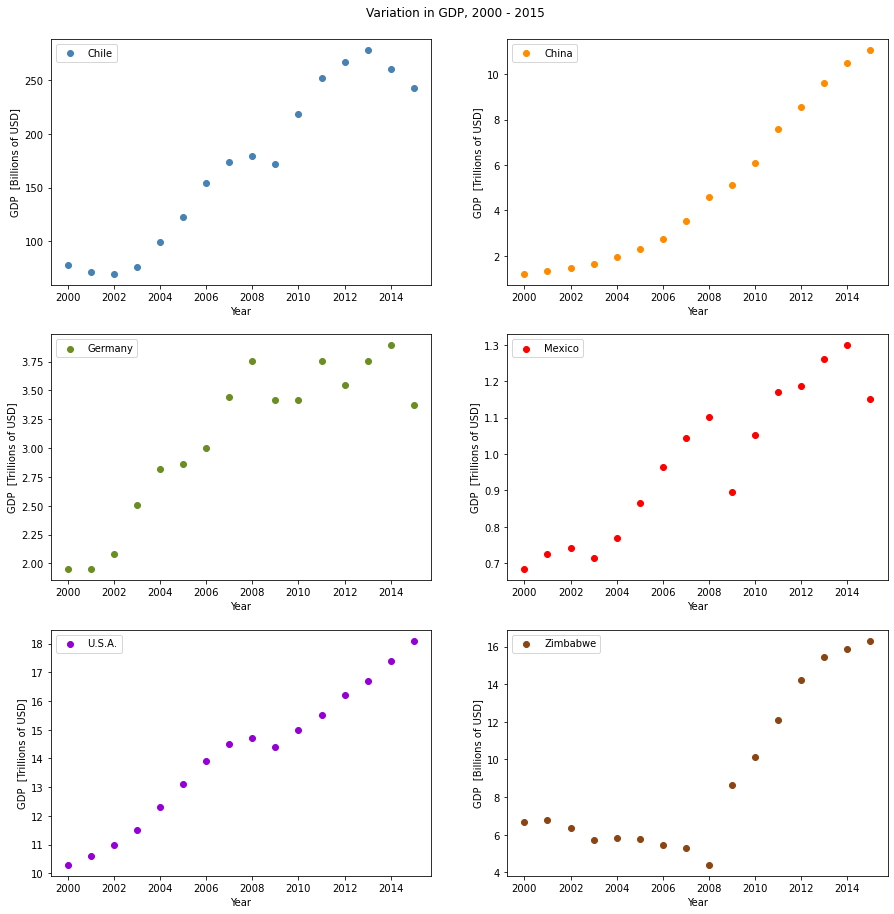

In [19]:
plt.figure(figsize=(15, 15)) 

# Since I already have the data split into 6 DataFrames, one for each country, I will use those individual DataFrames
# when plotting rather than the main alldata DataFrame. This will make the code easier to interpret.

plt.subplot(3,2,1)
plt.scatter(chiledata.year, chiledata.gdp_bil_usd, color = 'steelblue')
plt.legend(['Chile'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Billions of USD]')

plt.subplot(3,2,2)
plt.scatter(chinadata.year, chinadata.gdp_tril_usd, color = 'darkorange')
plt.legend(['China'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Trillions of USD]')

plt.subplot(3,2,3)
plt.scatter(germanydata.year, germanydata.gdp_tril_usd, color = 'olivedrab')
plt.legend(['Germany'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Trillions of USD]')

plt.subplot(3,2,4)
plt.scatter(mexicodata.year, mexicodata.gdp_tril_usd, color = 'red')
plt.legend(['Mexico'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Trillions of USD]')

plt.subplot(3,2,5)
plt.scatter(usadata.year, usadata.gdp_tril_usd, color = 'darkviolet')
plt.legend(['U.S.A.'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Trillions of USD]')

plt.subplot(3,2,6)
plt.scatter(zimbabwedata.year, zimbabwedata.gdp_bil_usd, color = 'saddlebrown')
plt.legend(['Zimbabwe'], loc = 'upper left')
plt.xlabel('Year')
plt.ylabel('GDP  [Billions of USD]')

plt.suptitle('Variation in GDP, 2000 - 2015', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9)

plt.savefig('fig_6_gdp_over_time.png')

Of all the trends of GDP with time, that of the U.S. comes the closest to being linear; however, one can clearly see the economic downturn of 2008--2010 as a "dip" in the line. Germany's GDP was for all intents and purposes, constant between 2008 and 2016, whereas the plots of Chile and Mexico both show a double peak feature. China's rate of GDP growth is decidedly non-linear; the visual appearance of the data reminds me of a plot of asinh(x). But once again, Zimbabwe's plot is the most interesting of the six. While the plots of GDP vs. time for the U.S. Mexico, and Chile all demonstrate a downturn between ~2008 and ~2010, Zimbabwe's GDP pretty steadily <i>decreased</i> between 2001 and 2008. (There was an ever so slight increase in GDP from 2000 to 2001.) Then, starting around 2009, there was a very rapid growth in GDP. This is quite roughly the same timescale over which life expectancy at birth started increasing rapidly. Thus I am even more curious to know what was happening in Zimbabwe between ~2006 and ~2009 which caused such rapid changes in both GDP and life expectancy at birth.

<h2> Life Expectancy at Birth as a Function of GDP </h2>
<br>
Given that the data I was provided with was 16 data points of year, GDP, and life expectancy at birth for 6 countries, it is perfectly natural to ask if GDP and life expectancy are correlated. Indeed, one might expect that the higher a country's GDP, the more it is able to spend on health care and neonatal care, and thus the higher the life expectancy (at birth) of its citizens. It will be important to consider how the GDP of each country correlates with the life expectancy (at birth) of each country in this investigation rather than to try and do some sort of global comparison. The reason for this is that different countries clearly have GDPs of different scales, so it may not be the absolute GDP in terms of U.S. dollar value that matters but rather the relative GDP value for each country. Or in other words, just because the GDP of Zimbabwe is about 4 orders of magnitude below the GDP of the U.S., that doesn't mean that its life expectancy doesn't correlate with GDP. We need to consider each country on its own GDP scale to make a determination.<br>
<br>
In terms of the terminology used for the below plot and its making, I am returning to my roots as a physicist. I hypothesize that it is GDP that influences life expectancy at birth, and not the other way around. In other words, I assume that GDP is the independent variable--it does what it does--and life expectancy at birth is the dependent variable which reacts to what GDP does. This is important because it sets up the terminology to be used: life expectancy as a function of GDP, because the dependent variable is assumed to be a function of the independent variable. It also determines what will go on the horizontal and vertical axes of the plot. Traditionally, the independent variable is plotted on the horizontal axis of a plot; since I am hypothesizing that GDP is the independent variable here, it will be plotted on the horizontal axis of the plots below. This means that life expectancy at birth, the dependent variable, will be plotted on the vertical axis. Once again, the GDPs of Chile and Zimbabwe will be plotted in billions of U.S. dollars while the GDPs of China, Germany, Mexico, and the U.S. are plotted in trillions of U.S. dollars. The ranges of the horizontal and vertical axis of each plot will be set as appropriate for the scale of the data for each country. And, all six plots for all six countries will be combined into one figure. <br>
<br>
(If one wants to be even more careful about things, one should think of the life expectancy at birth vs. GDP as a parametric plot, because it is clear from my plots of life expectancy at birth vs. time and GDP vs time that both life expectancy at birth and GDP are functions of time. The hypothesis here is that life expectancy at birth is also a function of GDP: so if one calls GDP $x$ and life expectancy at birth $y$, then $x = x(t)$ and $y = f(x(t),t).$)

In any event, the figure:

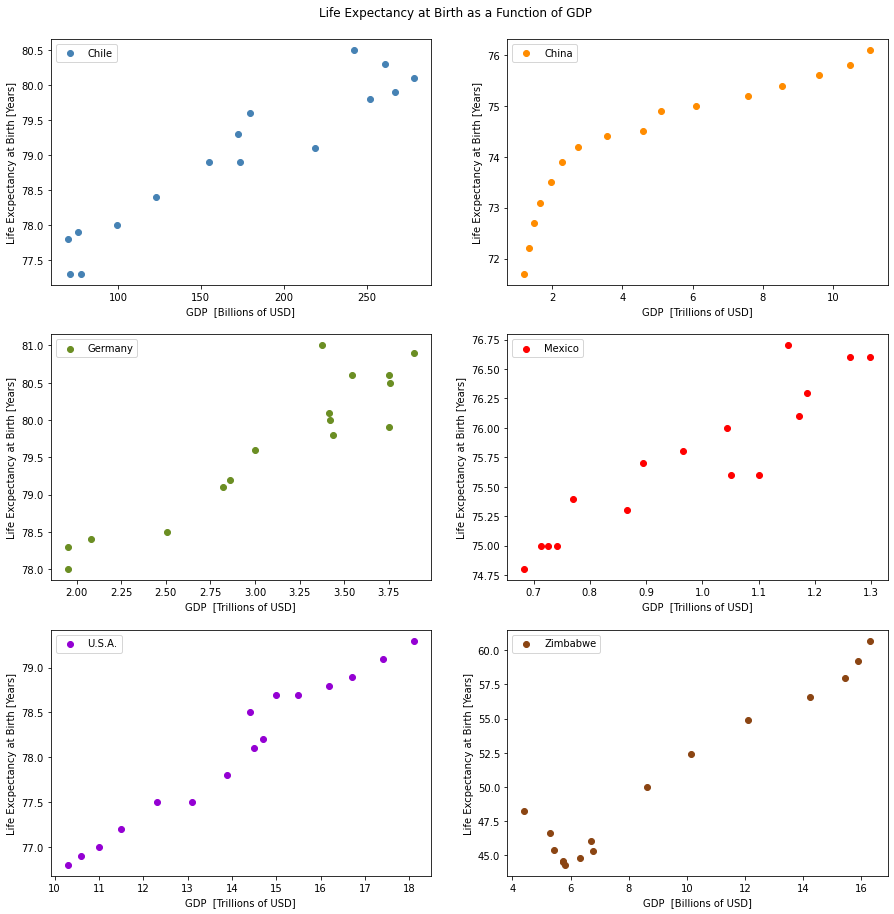

In [20]:
plt.figure(figsize=(15, 15)) 

# Since I already have the data split into 6 DataFrames, one for each country, I will use those individual DataFrames
# when plotting rather than the main alldata DataFrame. This will make the code easier to interpret.

plt.subplot(3,2,1)
plt.scatter(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth, color = 'steelblue')
plt.legend(['Chile'], loc = 'upper left')
plt.xlabel('GDP  [Billions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,2)
plt.scatter(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth, color = 'darkorange')
plt.legend(['China'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,3)
plt.scatter(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth, color = 'olivedrab')
plt.legend(['Germany'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,4)
plt.scatter(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth, color = 'red')
plt.legend(['Mexico'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,5)
plt.scatter(usadata.gdp_tril_usd, usadata.life_expect_at_birth, color = 'darkviolet')
plt.legend(['U.S.A.'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.subplot(3,2,6)
plt.scatter(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth, color = 'saddlebrown')
plt.legend(['Zimbabwe'], loc = 'upper left')
plt.xlabel('GDP  [Billions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.suptitle('Life Expectancy at Birth as a Function of GDP', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9)

plt.savefig('fig_7_life_expectancy_vs_gdp.png')

As expected, one of these life expectancy at birth vs. GDP plot shows a linear relationship between life expectancy and GDP, but nonetheless all plots except for that of Zimbabwe show a clear, positive correlation between GDP and life expectancy: the higher a country's GDP, the higher its life expectancy. This is the most important trend to take away from this data. The high GDP of the U.S. might not lead to the highest life expectancy at birth, but considering only the U.S. the higher the GDP of the U.S. the higher the life expectancy of U.S. citizens. The same goes for all other countries except Zimbabwe. As for Zimbabwe, once a GDP of ~ 6 billion U.S. dollars was reached, life expectancy was positively correlated with GDP. Between ~4 billion U.S. dollars and ~6 billion U.S. dollars, life expectancy seems to be <i>negatively</i> correlated with GDP. Overall, then, one can say that life expectancy at birth and GDP tend to be positively correlated, although at very small values of GDP this may not be the case.

<b> Testing for a Positive Correlation Between Life Expectancy at Birth and GDP: </b> <br>
I should give some quantitative indication about how strong this positive correlation between life expectancy at birth and GDP seems to be, rather than assert that there seems to be one visually. To that end, let me borrow an idea from the Pokemon project that I did (<a href="https://github.com/macaler/Pokemon">Pokemon</a>) and investigate both the Pearson correlation coefficient and Spearman rank correlation for each of the 6 nations in the figure above. As I mentioned in my Pokemon project, the Pearson correlation coefficient measures the linear correlation between two variables. The data don't look all that linear to me, but I should let the Pearson correlation coefficient be the judge of that. Also mentioned in my Pokemon project is that the Spearman rank correlation "assesses how well the relationship between two variables can be described using a monotonic function." (source: <a href="https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient">https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient</a>) I expect this statistic will give a good indication of whether or not life expectancy at birth and GDP are positively correlated, as it does not assume a linear relationship between the variables.<br>
<br> Now that I have described the ways I will quantitatively test for a positive correlation between life expectancy at birth and GDP, and why I am using those particular metrics, I will use the SciPy stats functions <i>pearsonr</i> and <i>spearmanr</i> to find the Pearson correlation coefficient and Spearman rank correlation between GDP and life expectancy at birth for each nation. Since I have already split off the data for each nation into its own DataFrame (to make calculating average values easier), I will make use of those individual DataFrames here to make the calculations easier to follow.

In [21]:
# Pearson r and Spearman s for Chile:
r_value_chile, p_val_of_r_chile = pearsonr(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth)
s_value_chile, p_val_of_s_chile = spearmanr(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth)

# Pearson r and Spearman s for China:
r_value_china, p_val_of_r_china = pearsonr(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth)
s_value_china, p_val_of_s_china = spearmanr(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth)

# Pearson r and Spearman s for Germany:
r_value_germany, p_val_of_r_germany = pearsonr(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth)
s_value_germany, p_val_of_s_germany = spearmanr(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth)

# Pearson r and Spearman s for Mexico:
r_value_mexico, p_val_of_r_mexico = pearsonr(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth)
s_value_mexico, p_val_of_s_mexico = spearmanr(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth)

# Pearson r and Spearman s for the U.S.:
r_value_usa, p_val_of_r_usa = pearsonr(usadata.gdp_tril_usd, usadata.life_expect_at_birth)
s_value_usa, p_val_of_s_usa = spearmanr(usadata.gdp_tril_usd, usadata.life_expect_at_birth)

# Pearson r and Spearman s for Zimbabwe:
r_value_zimbabwe, p_val_of_r_zimbabwe = pearsonr(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth)
s_value_zimbabwe, p_val_of_s_zimbabwe = spearmanr(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth)

In [22]:
# Print out r and s for each nation to three digits:

#Chile:
print('Chile Pearson r: ' + str(round(r_value_chile,3)) + \
      '; Chile Spearman rank correlation coefficient: ' + str(round(s_value_chile,3)))
print('')

# China:
print('China Pearson r: ' + str(round(r_value_china,3)) + \
      '; China Spearman rank correlation coefficient: ' + str(round(s_value_china,3)))
print('')

# Germany:
print('Germany Pearson r: ' + str(round(r_value_germany,3)) + \
      '; Germany Spearman rank correlation coefficient: ' + str(round(s_value_germany,3)))
print('')

# Mexico:
print('Mexico Pearson r: ' + str(round(r_value_mexico,3)) + 
      '; Mexico Spearman rank correlation coefficient: ' + str(round(s_value_mexico,3)))
print('')

# the U.S.:
print('U.S.A. Pearson r: ' + str(round(r_value_usa,3)) + \
      '; U.S.A. Spearman rank correlation coefficient: ' + str(round(s_value_usa,3)))
print('')

# Zimbabwe:
print('Zimbabwe Pearson r: ' + str(round(r_value_zimbabwe,3)) + \
      '; Zimbabwe Spearman rank correlation coefficient: ' + str(round(s_value_zimbabwe,3)))

Chile Pearson r: 0.95; Chile Spearman rank correlation coefficient: 0.928

China Pearson r: 0.909; China Spearman rank correlation coefficient: 1.0

Germany Pearson r: 0.933; Germany Spearman rank correlation coefficient: 0.845

Mexico Pearson r: 0.932; Mexico Spearman rank correlation coefficient: 0.919

U.S.A. Pearson r: 0.982; U.S.A. Spearman rank correlation coefficient: 0.99

Zimbabwe Pearson r: 0.966; Zimbabwe Spearman rank correlation coefficient: 0.753


All of the Pearson correlation coefficients are 0.9 or above, indicating a strong linear correlation between the variables. I admit, this surprises me greatly, as the data don't look all that linear to me (except for the U.S. possibly, and maybe Mexico). China has the lowest r value which makes sense as its curve looks more like some sort of cubic function rather than a line. 

Looking at the Spearman rank correlation, it is 1.0 for China, which makes a great deal of sense to me as that curve clearly looks like a nice, smooth monotonic function (perhaps a cubic function) with only one "kink' in it. Zimbabwe's s value is the lowest, which makes sense given that the curve decreases to a local minimum and then increases from there. Given the high scatter in life expectancy at birth at high GDP for Germany, it does not surprise me that its Spearman rank correlation coefficient falls below 0.9. The U.S.'s high s value also makes sense, as it only has one major "kink" in the curve but otherwise looks to be a relatively smooth, monotonic function; I am a bit surprised by the relatively high s value for Chile, as its as there does not appear to be a monotonic relationship between GDP and life expectancy at high values of GDP. 

In summary, each value of the Spearman rank correlation coefficient s was positive and greater than 0.75, indicating a positive correlation between life expectancy at birth and GDP. This is evidence that my visual interpretation of the plots was reasonable. In all cases, the Pearson correlation coefficient r indicates that this positive correlation is roughly linear.

<b> Fitting a Linear Trendline to the Life Expectancy at Birth vs. GDP Data: </b> <br>
Since the Pearson correlation coefficient indicates that there is a positive, roughly linear correlation between life expectancy at birth and GDP, it makes sense to fit a linear trendline to the data to see how well that trendline compares visually to the data. I do so below using the Scikit-Learn class <i>LinearRegression()</i>.

In [23]:
# For calculational convenience, pluck off the GDP and life expectancy data for China:
chile_gdp = chiledata[['gdp_bil_usd']]
chile_leab = chiledata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
chileline = LinearRegression()
chileline.fit(chile_gdp, chile_leab)
chileline_predict = chileline.predict(chile_gdp)

# Print the slope of the trendline:
print("Slope of Chile's trendline: " + str(chileline.coef_))
print("y-intercept of Chile's trendline: " + str(chileline.intercept_))

# For calculational convenience, pluck off the GDP and life expectancy data for China:
china_gdp = chinadata[['gdp_tril_usd']]
china_leab = chinadata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
chinaline = LinearRegression()
chinaline.fit(china_gdp, china_leab)
chinaline_predict = chinaline.predict(china_gdp)

# Print the slope of the trendline:
print("Slope of China's trendline: " + str(chinaline.coef_))
print("y-intercept of China's trendline: " + str(chinaline.intercept_))

# For calculational convenience, pluck off the GDP and life expectancy data for Germany:
germany_gdp = germanydata[['gdp_tril_usd']]
germany_leab = germanydata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
germanyline = LinearRegression()
germanyline.fit(germany_gdp, germany_leab)
germanyline_predict = germanyline.predict(germany_gdp)

# Print the slope of the trendline:
print("Slope of Germany's trendline: " + str(germanyline.coef_))
print("y-intercept of Germany's trendline: " + str(germanyline.intercept_))

# For calculational convenience, pluck off the GDP and life expectancy data for Mexico:
mexico_gdp = mexicodata[['gdp_tril_usd']]
mexico_leab = mexicodata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
mexicoline = LinearRegression()
mexicoline.fit(mexico_gdp, mexico_leab)
mexicoline_predict = mexicoline.predict(mexico_gdp)

# Print the slope of the trendline:
print("Slope of Mexico's trendline: " + str(mexicoline.coef_))
print("y-intercept of Mexico's trendline: " + str(mexicoline.intercept_))

# For calculational convenience, pluck off the GDP and life expectancy data for the U.S.:
usa_gdp = usadata[['gdp_tril_usd']]
usa_leab = usadata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
usaline = LinearRegression()
usaline.fit(usa_gdp, usa_leab)
usaline_predict = usaline.predict(usa_gdp)

# Print the slope of the trendline:
print("Slope of the U.S.'s trendline: " + str(usaline.coef_))
print("y-intercept of the U.S.'s trendline: " + str(usaline.intercept_))

# For calculational convenience, pluck off the GDP and life expectancy data for Zimbabwe:
zimbabwe_gdp = zimbabwedata[['gdp_bil_usd']]
zimbabwe_leab = zimbabwedata[['life_expect_at_birth']]

# Fit a linear trendline to the data, and use it to predict life expectancy given GDP:
zimbabweline = LinearRegression()
zimbabweline.fit(zimbabwe_gdp, zimbabwe_leab)
zimbabweline_predict = zimbabweline.predict(zimbabwe_gdp)

# Print the slope of the trendline:
print("Slope of Zimbabwe's trendline: " + str(zimbabweline.coef_))
print("y-intercept of Zimbabwe's trendline: " + str(zimbabweline.intercept_))

Slope of Chile's trendline: [[0.01308337]]
y-intercept of Chile's trendline: [76.72233939]
Slope of China's trendline: [[0.34202188]]
y-intercept of China's trendline: [72.56685342]
Slope of Germany's trendline: [[1.36239725]]
y-intercept of Germany's trendline: [75.43993621]
Slope of Mexico's trendline: [[2.76233749]]
y-intercept of Mexico's trendline: [73.02091136]
Slope of the U.S.'s trendline: [[0.33598062]]
y-intercept of the U.S.'s trendline: [73.33357272]
Slope of Zimbabwe's trendline: [[1.33529881]]
y-intercept of Zimbabwe's trendline: [37.99249827]


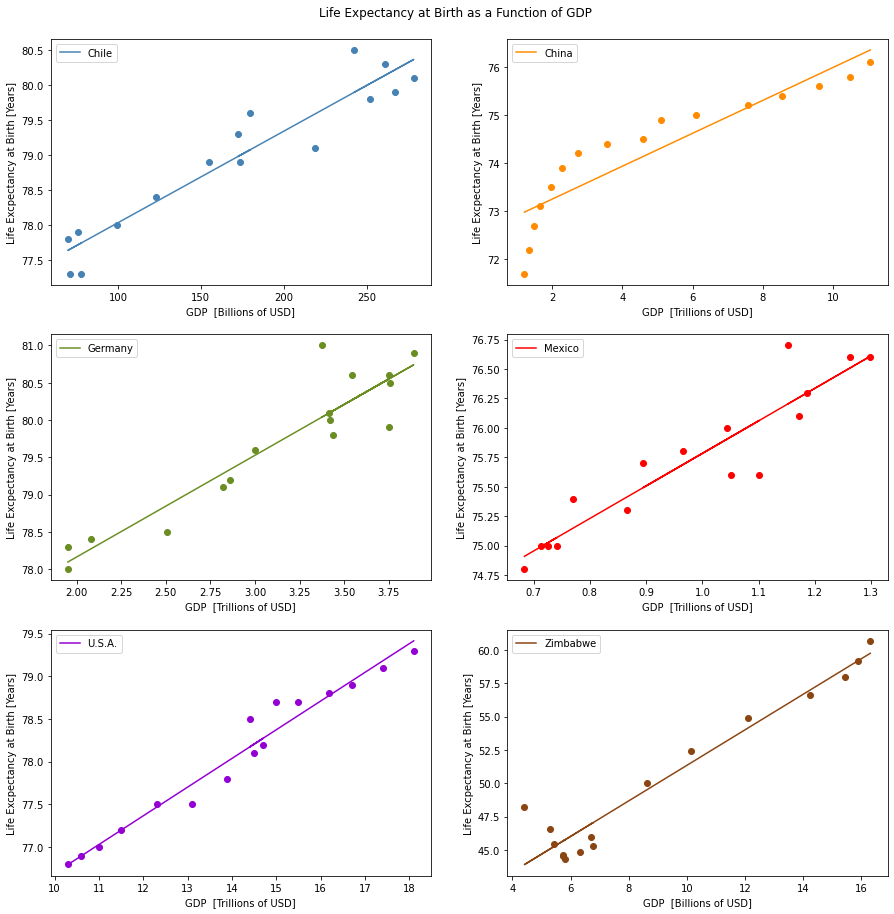

In [24]:
# Include the predicted life expectancy trendlines on each scatter plot of life expectancy at birth vs GDP:

plt.figure(figsize=(15, 15)) 

# Scatter plot and trendline for Chile:
plt.subplot(3,2,1)
plt.scatter(chiledata.gdp_bil_usd, chiledata.life_expect_at_birth, color = 'steelblue')
plt.plot(chiledata.gdp_bil_usd, chileline_predict, color = 'steelblue')
plt.legend(['Chile'], loc = 'upper left')
plt.xlabel('GDP  [Billions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

# Scatter plot and trendline for China:
plt.subplot(3,2,2)
plt.scatter(chinadata.gdp_tril_usd, chinadata.life_expect_at_birth, color = 'darkorange')
plt.plot(chinadata.gdp_tril_usd, chinaline_predict, color = 'darkorange')
plt.legend(['China'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

# Scatter plot and trendline for Germany:
plt.subplot(3,2,3)
plt.scatter(germanydata.gdp_tril_usd, germanydata.life_expect_at_birth, color = 'olivedrab')
plt.plot(germanydata.gdp_tril_usd, germanyline_predict, color = 'olivedrab')
plt.legend(['Germany'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

# Scatter plot and trendline for Mexico:
plt.subplot(3,2,4)
plt.scatter(mexicodata.gdp_tril_usd, mexicodata.life_expect_at_birth, color = 'red')
plt.plot(mexicodata.gdp_tril_usd, mexicoline_predict, color = 'red')
plt.legend(['Mexico'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

# Scatter plot and trendline for the U.S.:
plt.subplot(3,2,5)
plt.scatter(usadata.gdp_tril_usd, usadata.life_expect_at_birth, color = 'darkviolet')
plt.plot(usadata.gdp_tril_usd, usaline_predict, color = 'darkviolet')
plt.legend(['U.S.A.'], loc = 'upper left')
plt.xlabel('GDP  [Trillions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

# Scatter plot and trendline for Zimbabwe:
plt.subplot(3,2,6)
plt.scatter(zimbabwedata.gdp_bil_usd, zimbabwedata.life_expect_at_birth, color = 'saddlebrown')
plt.plot(zimbabwedata.gdp_bil_usd, zimbabweline_predict, color = 'saddlebrown')
plt.legend(['Zimbabwe'], loc = 'upper left')
plt.xlabel('GDP  [Billions of USD]')
plt.ylabel('Life Excpectancy at Birth [Years]')

plt.suptitle('Life Expectancy at Birth as a Function of GDP', x = 0.5, y = 0.93)
plt.subplots_adjust(top=0.9)

plt.savefig('fig_8_life_expectancy_vs_gdp_with_trendlines.png')